Analyzing the Relationship between Covid Death Rates and Per Capita Income for U.S. Counties

Import Libraries 

In [1]:
import pandas as pd 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Load Covid Data

In [2]:
df_county_covid= pd.read_csv('usa_county_wise.csv')
df_county_covid

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


Check Covid Data Set for nulls 

In [3]:
df_county_covid.isnull().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

Drop unimportant columns

In [4]:
clean_covid_data= df_county_covid.dropna(subset=['Admin2'], inplace=True)
clean_covid_data= df_county_covid.drop(columns=['UID','iso2', 'iso3', 'code3', 'FIPS', 'Country_Region'])


In [5]:
clean_covid_data = df_county_covid[df_county_covid['Admin2'] != 'Unassigned']

Calculate Sums of Deaths and Confirmed Cases by County. Drop smaller values for confirmed cases and deaths to improve data accuracy

In [6]:
covid_data_summed = clean_covid_data.groupby(['Admin2', 'Province_State']).agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()
covid_data_summed = covid_data_summed[covid_data_summed['Confirmed'] > 5000]
covid_data_summed = covid_data_summed[covid_data_summed['Deaths'] > 1000]

Describe Covid Data 

In [7]:
covid_data_summed.describe()

,Confirmed,Deaths
count,6.720000e+02,6.720000e+02
mean,2.947845e+05,1.559869e+04
std,1.034362e+06,9.537730e+04
min,5.650000e+03,1.004000e+03
25%,3.634800e+04,1.748000e+03
50%,8.343800e+04,3.069000e+03
75%,2.214262e+05,7.595750e+03
max,2.181329e+07,2.355309e+06


Box Plots for Confirmed and Death Data:

In [8]:

px.box(covid_data_summed['Confirmed'], title='Box Plot of Confirmed Cases', labels={'Confirmed Cases': 'Confirmed Cases'})


In [9]:

px.box(covid_data_summed["Deaths"], title='Box Plot of Deaths', labels={'Deaths': 'Deaths'})

Create a New Variable: Death Rates. This variable standardizes death and confirmed case information so that factors such as population size have a lesser impact. 

In [11]:
covid_data_summed["death rate"]= covid_data_summed["Deaths"]/covid_data_summed["Confirmed"]

Box Plot of Death Rates:

In [12]:
px.box(covid_data_summed['death rate'], title='Box Plot of Death Rates')

Covid Data Top Death Rates :

In [13]:
covid_data_summed.sort_values(by= "death rate", ascending= False)[0:20]

,Admin2,Province_State,Confirmed,Deaths,death rate
3048,Waldo,Maine,5650,1371,0.242655
852,Dukes and Nantucket,Massachusetts,5918,1433,0.242143
2134,Nez Perce,Idaho,8956,1913,0.213600
463,Chaffee,Colorado,9633,1810,0.187896
2022,Monroe,Ohio,6195,1046,0.168846
3136,Wayne,Ohio,28335,4708,0.166155
2210,Orleans,New York,21747,3548,0.163149
2201,Orange,Indiana,12303,1989,0.161668
1860,Marquette,Michigan,6751,1054,0.156125
2823,Steuben,New York,26749,4082,0.152604


Load Income Data

In [14]:
df_county_income = pd.read_csv('lapi.csv', skiprows=4)
df_county_income.columns = ['County', 'Per capita income 2020', 'Per capita income 2021', 'Per capita income 2022', 'Rank in state', 'Percent change 2021', 'Percent change 2022', 'Rank in state 2022']
df_county_income[0:100]

,County,Per capita income 2020,Per capita income 2021,Per capita income 2022,Rank in state,Percent change 2021,Percent change 2022,Rank in state 2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"45,887","50,059","50,916",--,9.1,1.7,--
2,Autauga,"45,151","48,914","49,391",9,8.3,1.0,29
3,Baldwin,"51,230","55,865","56,747",4,9.0,1.6,21
4,Barbour,"37,111","40,795","40,560",52,9.9,-0.6,53
...,...,...,...,...,...,...,...,...
95,Sitka City and Borough,"67,848","75,822","80,252",4,11.8,5.8,12
96,Skagway Municipality,"57,961","67,477","75,545",6,16.4,12.0,3
97,Southeast Fairbanks Census Area,"53,262","58,798","60,361",24,10.4,2.7,28
98,Wrangell City and Borough,"56,521","59,141","60,959",22,4.6,3.1,25


Find the null values

In [15]:
df_county_income.isnull().sum()

County                    51
Per capita income 2020    56
Per capita income 2021    56
Per capita income 2022    56
Rank in state             56
Percent change 2021       56
Percent change 2022       56
Rank in state 2022        56
dtype: int64

Drop nulls 

In [16]:
df_county_income= df_county_income.dropna(subset=["County", "Per capita income 2020", "Per capita income 2020", "Per capita income 2022"])

In [17]:
df_county_income.isnull().sum()

County                    0
Per capita income 2020    0
Per capita income 2021    0
Per capita income 2022    0
Rank in state             0
Percent change 2021       0
Percent change 2022       0
Rank in state 2022        0
dtype: int64

Drop Unimportant Columns :

In [18]:
df_county_income_cleaned= df_county_income.drop(columns=["Rank in state", "Rank in state 2022"])

In [19]:
covid_data_summed.columns = covid_data_summed.columns.str.strip()
df_county_income_cleaned.columns = df_county_income_cleaned.columns.str.strip()


Merge Covid and Income Data

In [20]:

merged_df = pd.merge(covid_data_summed, df_county_income_cleaned, left_on='Admin2', right_on='County', how='inner')
print(merged_df)

        Admin2 Province_State  Confirmed  Deaths  death rate    County  \
0       Acadia      Louisiana      69079    2830    0.040968    Acadia   
1     Accomack       Virginia      79380    1093    0.013769  Accomack   
2          Ada          Idaho     201142    2401    0.011937       Ada   
3        Adair       Kentucky      11066    1648    0.148925     Adair   
4        Adair       Kentucky      11066    1648    0.148925     Adair   
...        ...            ...        ...     ...         ...       ...   
3304      York   Pennsylvania     124665    3486    0.027963      York   
3305      York   Pennsylvania     124665    3486    0.027963      York   
3306      York   Pennsylvania     124665    3486    0.027963      York   
3307      Yuma        Arizona     351965    6000    0.017047      Yuma   
3308      Yuma        Arizona     351965    6000    0.017047      Yuma   

     Per capita income 2020 Per capita income 2021 Per capita income 2022  \
0                    43,949       

Convert Variable Types to Numeric

In [21]:
merged_df['Per capita income 2020'] = pd.to_numeric(merged_df['Per capita income 2020'].str.replace(',', ''), errors='coerce')
merged_df['Per capita income 2021'] = pd.to_numeric(merged_df['Per capita income 2021'].str.replace(',', ''), errors='coerce')

Describing Merged_df 

In [22]:
merged_df.describe()

,Confirmed,Deaths,death rate,Per capita income 2020,Per capita income 2021,Percent change 2021,Percent change 2022
count,3.309000e+03,3.309000e+03,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,2.193135e+05,1.178745e+04,0.057880,49187.598066,53518.363554,8.805258,1.006921
std,7.063537e+05,6.430377e+04,0.036016,12352.982375,13773.044186,4.060879,3.652087
min,5.650000e+03,1.004000e+03,0.006107,24472.000000,26152.000000,-11.700000,-21.100000
25%,3.016100e+04,1.617000e+03,0.029637,41199.000000,44864.000000,6.600000,-0.700000
50%,6.277300e+04,2.595000e+03,0.050372,46496.000000,50225.000000,8.500000,1.000000
75%,1.594560e+05,5.457000e+03,0.079136,53927.000000,58839.000000,10.100000,2.700000
max,2.181329e+07,2.355309e+06,0.242655,164349.000000,205410.000000,48.100000,41.300000


Box Plot of Per Capita Income:

In [23]:



px.box(merged_df['Per capita income 2020'], title='Box Plot of Per Capita Income 2020')


Sort merged data by death rate (smallest to largest)

In [24]:
merged_df.sort_values(by= "death rate", ascending= True)[0:20]

,Admin2,Province_State,Confirmed,Deaths,death rate,County,Per capita income 2020,Per capita income 2021,Per capita income 2022,Percent change 2021,Percent change 2022
2810,Utah,Utah,296530,1811,0.006107,Utah,47183,51103,"53,812",8.3,5.3
2809,Utah,Utah,296530,1811,0.006107,Utah,51751,57042,"59,457",10.2,4.2
2666,Stearns,Minnesota,180107,1284,0.007129,Stearns,54121,58117,"59,296",7.4,2.0
2348,Orange,Florida,740226,5918,0.007995,Orange,48829,54726,"55,374",12.1,1.2
2353,Orange,Florida,740226,5918,0.007995,Orange,52909,55304,"56,029",4.5,1.3
2352,Orange,Florida,740226,5918,0.007995,Orange,47175,49472,"50,170",4.9,1.4
2351,Orange,Florida,740226,5918,0.007995,Orange,72271,75349,"77,568",4.3,2.9
2350,Orange,Florida,740226,5918,0.007995,Orange,55350,57555,"58,136",4.0,1.0
2349,Orange,Florida,740226,5918,0.007995,Orange,40546,44026,"45,724",8.6,3.9
2354,Orange,Florida,740226,5918,0.007995,Orange,55580,59065,"58,942",6.3,-0.2


Combine Duplicate Counties and Average the Per capita income 2020 

In [25]:
merged_data_income_death_prob= merged_df.groupby(['County', 'Province_State','death rate', 'Confirmed', 'Deaths'])[['Per capita income 2020','Per capita income 2021']].mean().reset_index()
merged_data_income_death_prob

,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021
0,Acadia,Louisiana,0.040968,69079,2830,43949.000000,46156.000000
1,Accomack,Virginia,0.013769,79380,1093,50924.000000,56453.000000
2,Ada,Idaho,0.011937,201142,2401,58150.000000,64113.000000
3,Adair,Kentucky,0.148925,11066,1648,40604.250000,45780.000000
4,Adams,Colorado,0.036267,347199,12592,47351.583333,51561.166667
...,...,...,...,...,...,...,...
657,Yavapai,Arizona,0.019896,54281,1080,46954.000000,50065.000000
658,Yolo,California,0.054792,44368,2431,60305.000000,66308.000000
659,York,Maine,0.023573,43058,1015,54388.250000,59573.500000
660,York,Pennsylvania,0.027963,124665,3486,54388.250000,59573.500000


Describe Merge Data Death Rates by State :

In [26]:
 merged_data_income_death_prob.groupby('Province_State')['death rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Province_State,,,,,,,,
Alabama,16.0,0.039650,0.026317,0.009478,0.022817,0.034883,0.046305,0.120018
Arizona,10.0,0.032135,0.018778,0.012498,0.019449,0.026364,0.038737,0.070740
Arkansas,3.0,0.025322,0.016565,0.008271,0.017305,0.026340,0.033847,0.041355
California,25.0,0.021967,0.010454,0.008135,0.015253,0.019615,0.027075,0.054792
Colorado,14.0,0.067018,0.037367,0.036267,0.050002,0.059033,0.066857,0.187896
Connecticut,8.0,0.084247,0.031744,0.026362,0.075355,0.079233,0.096564,0.132928
Delaware,3.0,0.040377,0.006681,0.032815,0.037826,0.042836,0.044158,0.045480
District of Columbia,1.0,0.051043,NaN,0.051043,0.051043,0.051043,0.051043,0.051043
Florida,31.0,0.028577,0.017521,0.007995,0.015406,0.026148,0.037908,0.089878


Low Death Rate Counties Information and Median Income 

In [27]:
low_death_rates= merged_data_income_death_prob.sort_values(by= 'death rate', ascending=True)[0:100]
low_death_rates


,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021
595,Utah,Utah,0.006107,296530,1811,49467.000000,54072.500000
553,Stearns,Minnesota,0.007129,180107,1284,54121.000000,58117.000000
435,Orange,Florida,0.007995,740226,5918,56029.000000,59633.000000
511,Santa Barbara,California,0.008135,230737,1877,68801.000000,76910.000000
614,Washington,Arkansas,0.008271,192718,1594,50968.677419,56047.967742
...,...,...,...,...,...,...,...
98,Chesterfield,Virginia,0.020139,195537,3938,47038.500000,50638.000000
644,Williamson,Texas,0.020194,162125,3274,68537.000000,75642.333333
306,Lafayette,Louisiana,0.020294,178571,3624,43912.166667,48066.166667
176,El Paso,Texas,0.020344,455859,9274,47345.000000,51917.000000


In [28]:
low_death_incomes_median= low_death_rates['Per capita income 2020'].median()
low_death_incomes_median

51035.838709677424

High Death Rate Counties Information and Median Income 

In [29]:
high_death_rates= merged_data_income_death_prob.sort_values(by= 'death rate', ascending=False)[0:100]
high_death_rates

,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021
602,Waldo,Maine,0.242655,5650,1371,47866.000000,51915.000000
418,Nez Perce,Idaho,0.213600,8956,1913,47492.000000,51923.000000
87,Chaffee,Colorado,0.187896,9633,1810,56194.000000,62699.000000
388,Monroe,Ohio,0.168846,6195,1046,48526.764706,52950.823529
629,Wayne,Ohio,0.166155,28335,4708,42955.875000,46831.437500
...,...,...,...,...,...,...,...
620,Washington,Oklahoma,0.090376,36492,3298,50968.677419,56047.967742
64,Bucks,Pennsylvania,0.090105,510415,45991,78810.000000,84470.000000
395,Montgomery,Pennsylvania,0.090060,735202,66212,49048.705882,52677.176471
92,Charlotte,Florida,0.089878,65266,5866,43894.500000,48425.500000


In [30]:
high_death_income_median= high_death_rates['Per capita income 2020'].median()
high_death_income_median

47776.04166666667

Low Income Counties Information and Median Death Rate

In [31]:
low_income_counties= merged_data_income_death_prob.sort_values(by= 'Per capita income 2020', ascending=True)[0:100]
low_income_counties

,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021
362,McKinley,New Mexico,0.046580,253007,11785,31984.0,35211.0
640,Wilcox,Georgia,0.113095,11424,1292,32377.5,35987.0
317,Leake,Mississippi,0.027250,44587,1215,34832.0,40301.0
655,Wyandotte,Kansas,0.041631,184743,7691,36191.0,38363.0
608,Ware,Georgia,0.040040,35964,1440,36443.0,39081.0
...,...,...,...,...,...,...,...
582,Trumbull,Ohio,0.077755,69732,5422,43161.0,45780.0
15,Anderson,South Carolina,0.024101,52530,1266,43190.6,48270.2
416,Newport News,Virginia,0.022340,44942,1004,43197.0,46919.0
442,Osceola,Florida,0.011809,190696,2252,43209.0,48821.0


In [32]:
low_income_counties_average_death= low_income_counties['death rate'].median()
low_income_counties_average_death

0.046638285739845124

High Income Counties Information and Median Death Rate :

In [33]:
high_income_counties= merged_data_income_death_prob.sort_values(by= 'Per capita income 2020', ascending=False)[0:100]
high_income_counties

,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021
351,Marin,California,0.015253,145938,2226,144658.0,165673.0
507,San Mateo,California,0.033142,268629,8903,141882.0,174668.0
504,San Francisco,California,0.013928,314700,4383,134758.0,159968.0
512,Santa Clara,California,0.037239,416601,15514,124637.0,144552.0
415,New York,New York,0.107976,21813290,2355309,116165.0,134782.5
...,...,...,...,...,...,...,...
613,Warrick,Indiana,0.131019,19043,2495,61644.0,66353.0
493,Rockingham,New Hampshire,0.048780,129970,6340,61529.5,66387.5
584,Tulsa,Oklahoma,0.024205,242470,5869,61416.0,67314.0
430,Olmsted,Minnesota,0.016179,78622,1272,61338.0,66122.0


In [34]:
high_income_counties_death_rates= high_income_counties['death rate'].median()
high_income_counties_death_rates

0.049666841697604436

Scatter Plot of Per Capita Income for Counties with High Death Rates 

In [35]:
import matplotlib.pyplot as plt


px.scatter(high_death_rates, 
                 x='Per capita income 2020', 
                 y='death rate', 
                 color='Province_State', 
                 title='High Death Rates vs. Per Capita Income 2020 for Counties by State')

Scatter Plot of low death rates by Per capita income 2020

In [36]:

px.scatter(low_death_rates, 
                 x='Per capita income 2020', 
                 y='death rate', 
                 color='Province_State', 
                 title='Low Death Rates vs. Per Capita Income 2020 for Counties by State')

Scatter Plot of High Income Couunties by Death Rate:

In [37]:

px.scatter(high_income_counties, 
                 x='Per capita income 2020', 
                 y='death rate', 
                 color='Province_State', 
                 title='Death Rates vs. Per Capita Income 2020 by State for High Income Counties')


Scatter Plot of Low Income Counties by Per capita income 

In [38]:


px.scatter(merged_data_income_death_prob, 
                 x='Per capita income 2020', 
                 y='death rate', 
                 color='Province_State', 
                 title='Death Rates vs. Per Capita Income 2020 for Counties by State')

In [39]:

px.scatter(merged_data_income_death_prob, 
                 x='Per capita income 2021', 
                 y='death rate', 
                 color='Province_State', 
                 title='Death Rates vs. Per Capita Income 2021 for Counties by State')

Box Plot of Death Rates:

In [40]:

px.box(merged_data_income_death_prob['death rate'], title= "Death Rates", labels=['Death Rate'])


Median Death Rate Per State

In [41]:
average_state= merged_data_income_death_prob.groupby("Province_State")["death rate"].median().sort_values(ascending=False)
average_state

Province_State
West Virginia           0.084850
Ohio                    0.080497
Connecticut             0.079233
Indiana                 0.073325
New Jersey              0.073186
Massachusetts           0.070311
Pennsylvania            0.067232
Vermont                 0.066856
Oklahoma                0.061705
Michigan                0.061294
Colorado                0.059033
Missouri                0.057763
Louisiana               0.055392
Kentucky                0.053305
New York                0.051634
Maryland                0.051051
District of Columbia    0.051043
Mississippi             0.050948
Illinois                0.050026
Minnesota               0.046331
New Hampshire           0.044829
Georgia                 0.043302
Delaware                0.042836
New Mexico              0.042573
Kansas                  0.041631
Idaho                   0.041384
Washington              0.041349
Virginia                0.039104
Maine                   0.038356
Alabama                 0.03

In [42]:

fig = px.bar(average_state, 
             y='death rate', 
             title='Median Death Rate by State',
             labels={'death rate': 'Average Death Rate', "Province_State_Sorted": 'State'})

fig.show()

Box Plot of Death Rates by State

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



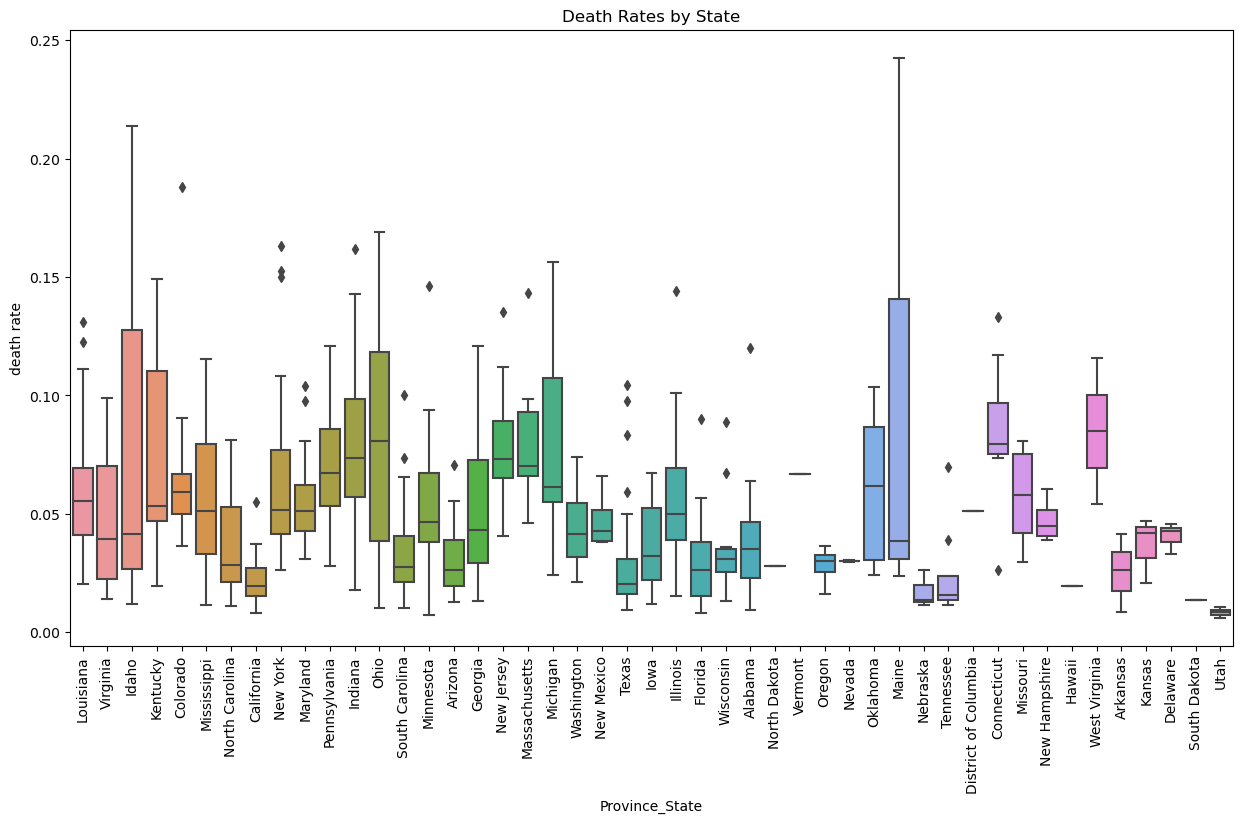

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Province_State', y='death rate', data= merged_data_income_death_prob)
plt.xticks(rotation=90)
plt.title('Death Rates by State')
plt.show()

In [44]:
death_rates_by_county= merged_data_income_death_prob.sort_values(by= "death rate", ascending=False)[0:40]

fig = px.bar(death_rates_by_county, 
             x= 'County',
             y='death rate', 
             color= 'Province_State',
             title='Death Rate by County (Top 40)',)

fig.show()

In [45]:
death_rates_by_county_low= merged_data_income_death_prob.sort_values(by= "death rate", ascending=True)[0:40]


fig = px.bar(death_rates_by_county_low, 
             x= 'County',
             y='death rate', 
             color= 'Province_State',
             title='Death Rate by County (Bottom 40)',)

fig.show()

Creating Clusters 

In [46]:
features = merged_data_income_death_prob[['Per capita income 2020','death rate']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data_income_death_prob['cluster'] = kmeans.fit_predict(features_scaled)
merged_data_income_death_prob



/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/alisepedersen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: Fut

,County,Province_State,death rate,Confirmed,Deaths,Per capita income 2020,Per capita income 2021,cluster
0,Acadia,Louisiana,0.040968,69079,2830,43949.000000,46156.000000,1
1,Accomack,Virginia,0.013769,79380,1093,50924.000000,56453.000000,1
2,Ada,Idaho,0.011937,201142,2401,58150.000000,64113.000000,1
3,Adair,Kentucky,0.148925,11066,1648,40604.250000,45780.000000,2
4,Adams,Colorado,0.036267,347199,12592,47351.583333,51561.166667,1
...,...,...,...,...,...,...,...,...
657,Yavapai,Arizona,0.019896,54281,1080,46954.000000,50065.000000,1
658,Yolo,California,0.054792,44368,2431,60305.000000,66308.000000,1
659,York,Maine,0.023573,43058,1015,54388.250000,59573.500000,1
660,York,Pennsylvania,0.027963,124665,3486,54388.250000,59573.500000,1


In [47]:

px.scatter(merged_data_income_death_prob, x='Per capita income 2020', y='death rate',  color='cluster',  title= 'K-Means Clustering of Counties')


Cluster Data: Median Data Rate and Per capita income 2020

In [48]:
cluster_death_rates= merged_data_income_death_prob.groupby("cluster")[["death rate", "Per capita income 2020"]].median()
cluster_death_rates["Cluster Counts"]= merged_data_income_death_prob["cluster"].value_counts().sort_index()
print(cluster_death_rates.sort_values(by= "death rate", ascending=True))



         death rate  Per capita income 2020  Cluster Counts
cluster                                                    
1          0.036874                 48586.0             437
0          0.051897                 73639.0              73
2          0.097121                 47521.5             152
